# Trabajo 1 - Nicolas Maldonado - AX840282
## Preparacion de Datos
8 / Diciembre / 2023<br>
Master en Ciencia de Datos y Aprendizaje Automatico

## Descripción: Passenger Safisfaccion

## Objetivo:
Que factores estan altamente correlacionados con la satisfaccion de los usuarios al volar en una aerolinea.

Empezamos cargando las librerias y el dataset, https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn

import pandas as pd
import numpy as np

## Cargue y validacion inicial de datos:

In [66]:
df =  pd.read_csv('Datasets/Airplane Satisfaction/train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


De la pagina de Kaggle extraemos la siguiente información:

    Gender: Gender of the passengers (Female, Male)
    Customer Type: The customer type (Loyal customer, disloyal customer)
    Age: The actual age of the passengers
    Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
    Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
    Flight distance: The flight distance of this journey
    Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
    Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
    Ease of Online booking: Satisfaction level of online booking
    Gate location: Satisfaction level of Gate location
    Food and drink: Satisfaction level of Food and drink
    Online boarding: Satisfaction level of online boarding
    Seat comfort: Satisfaction level of Seat comfort
    Inflight entertainment: Satisfaction level of inflight entertainment
    On-board service: Satisfaction level of On-board service
    Leg room service: Satisfaction level of Leg room service
    Baggage handling: Satisfaction level of baggage handling
    Check-in service: Satisfaction level of Check-in service
    Inflight service: Satisfaction level of inflight service
    Cleanliness: Satisfaction level of Cleanliness
    Departure Delay in Minutes: Minutes delayed when departure
    Arrival Delay in Minutes: Minutes delayed when Arrival
    Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Empezamos realizando una exploración inicial de los datos con un info y un describe, para ver nulos y en datos numericos ver promedios, maximos, minimos, etc.

In [47]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Considerando lo anterior, vamos a realizar una primera prueba eliminando las columnas categoricas y hacemos una prueba inicial para obtener un Score desde el cual vamos a partir a mejorar. Observamos tambien que el tarjet se encuentra categorico asi que codificamos sus valores con LabelEncoder.

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

df_clean = df.dropna(axis=0, how='any')
print("Conteo posterior a la eliminación de nulos: ", df_clean.shape)
label_encoder = LabelEncoder()  # OJO! LabelEncoder para la target
df_clean["satisfaction"] = label_encoder.fit_transform(df_clean["satisfaction"])
data = df_clean.select_dtypes(include=[np.number])

X, y = data.drop(columns=["satisfaction"]), data["satisfaction"]

Conteo posterior a la eliminación de nulos:  (103594, 25)


>RandomForestClassifier 0.949 (0.002)
>DecisionTreeClassifier 0.921 (0.002)
>KNeighborsClassifier 0.599 (0.005)
>LogisticRegression 0.664 (0.011)


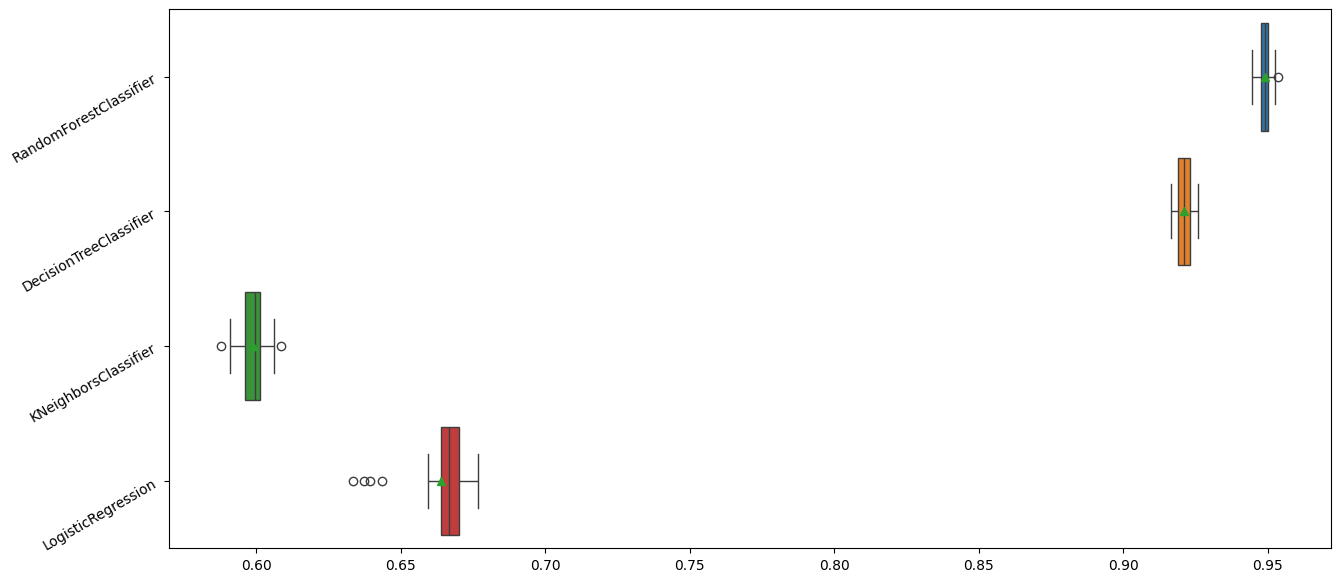

In [49]:
nombres = ["RandomForestClassifier", "DecisionTreeClassifier", "KNeighborsClassifier", "LogisticRegression"]
models = [RandomForestClassifier( ), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression()]
pipelines = [Pipeline(steps=[('mod', m)]) for m in models]

resultados = list()
for n, p in zip(nombres, pipelines):

    #Evaluamos el modelo
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(p, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    #Calculamos el accuracy de los resultados
    resultados.append(scores)
    print('>%s %.3f (%.3f)' % (n, scores.mean(), scores.std()))# plot model performance for comparison

plt.figure(figsize=(15,7))
t = sns.boxplot(data=resultados, showmeans=True, orient='h')
t.set_yticklabels(nombres,rotation=30)
plt.show()

Observamos que el mejor Score lo tenemos con el algoritmo RandomForestClassifier, llegando a 0.949. Empezamos realizando la validacion de nulos.

## Eliminacion de nulos

Comenzamos revisando los nulos existentes en el dataframe.

In [68]:
for i in df:
    # count number of rows with missing values
    n_miss = df[i].isna().sum()
    if n_miss > 0:
        perc = n_miss / df.shape[0] * 100
        print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))
df[df.isna().any(axis=1)]

> Arrival Delay in Minutes, Missing: 310 (0.3%)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


Considerando la naturaleza de la colummna y evidenciando que son solamente el 0.3% de los datos, decidimos borrar esas instancias para evitar problemas con el modelo.

In [69]:
df.dropna(inplace=True)

## Validacion de duplicados

In [70]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Unnamed: 0, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 25 columns]


Observamos que como tal no tenemos registros duplicados asi que continuamos con el analisis.
## Dispersion
Continuamos validando la dispersion que tiene cada caracteristica.

In [71]:
print("Categoricas: ", df.select_dtypes(include=['object']).columns)
for c in df:
    lista = df[c].unique()
    if df[c].dtype == 'object':
        print(f"{c}:", lista)
print("Numericas: ", df.select_dtypes(include=['int64','float64']).columns)
for c in df:
    lista = df[c].unique()
    if df[c].dtype != 'object':
        print(f"{c}:", len(lista))

Categoricas:  Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')
Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']
Numericas:  Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
Unnamed: 0: 103594
id: 103594
Age: 75
Flight Distance: 3802
Inflight wifi service: 6
Departure/Arrival time convenient: 6
Ease of Online booking: 6
Gate location: 6
Food and drink: 

Observamos como varias de las columnas numericas tienen entre 5 y 6 valores distintos unicamente, aunque tenemos 103904 instancias, podriamos asumir que son los puntajes asignados, pero igual procedemos a mostrar dichos valores.

In [13]:
df[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']].head(15)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
5,3,4,2,1,1,2,1,1,3,4,4,4,4,1
6,2,4,2,3,2,2,2,2,3,3,4,3,5,2
7,4,3,4,4,5,5,5,5,5,5,5,4,5,4
8,1,2,2,2,4,3,3,1,1,2,1,4,1,2
9,3,3,3,4,2,3,3,2,2,3,4,4,3,2


In [14]:
df.select_dtypes(include=[np.number]).std(axis= 0)

Unnamed: 0                           29997.914016
id                                   37460.816597
Age                                     15.113125
Flight Distance                        997.297235
Inflight wifi service                    1.327866
Departure/Arrival time convenient        1.525233
Ease of Online booking                   1.398934
Gate location                            1.277723
Food and drink                           1.329401
Online boarding                          1.349433
Seat comfort                             1.318896
Inflight entertainment                   1.333030
On-board service                         1.288284
Leg room service                         1.315409
Baggage handling                         1.181051
Checkin service                          1.265396
Inflight service                         1.175603
Cleanliness                              1.312194
Departure Delay in Minutes              38.116737
Arrival Delay in Minutes                38.698682


Empezamos el tratamiento separando las columnas para realizar tratamientos independientes.

In [72]:
df_trated = df.copy()
y = df_trated['satisfaction']
df_trated.drop(['satisfaction'], axis=1, inplace=True)
categorical_ix = df_trated.select_dtypes(include='object').columns 
numerical_ix = df_trated.select_dtypes(include=['float64','int']).columns

In [73]:
from collections import Counter
print(Counter(y))
print(y.groupby(y).size()[0]/y.shape[0])
print(y.groupby(y).size()[1]/y.shape[0])

Counter({'neutral or dissatisfied': 58697, 'satisfied': 44897})
0.5666061741027473
0.4333938258972527


De acuerdo a la info hecho mas arriba observamos que para la mayoria de caracteristicas categoricas contamos con unicamente dos valores, pero para la caracteristica 'Class' tenemos 3 categorias, las cuales pueden ser ordenadas de forma nominal, razon por la cual procedemos a codificarlas de esta manera.

Adicionalmente podemos ver como el dataset, aunque no esta balanceado, tampoco esta completamente desbalanceado, teniendo una relacion de 43-56% aproximadanamente, evitando asi tener que hacer balanceo de estos.

## Ordinal Encoding

>RandomForestClassifier 0.964 (0.001)
>DecisionTreeClassifier 0.947 (0.002)
>KNeighborsClassifier 0.599 (0.005)
>LogisticRegression 0.678 (0.019)


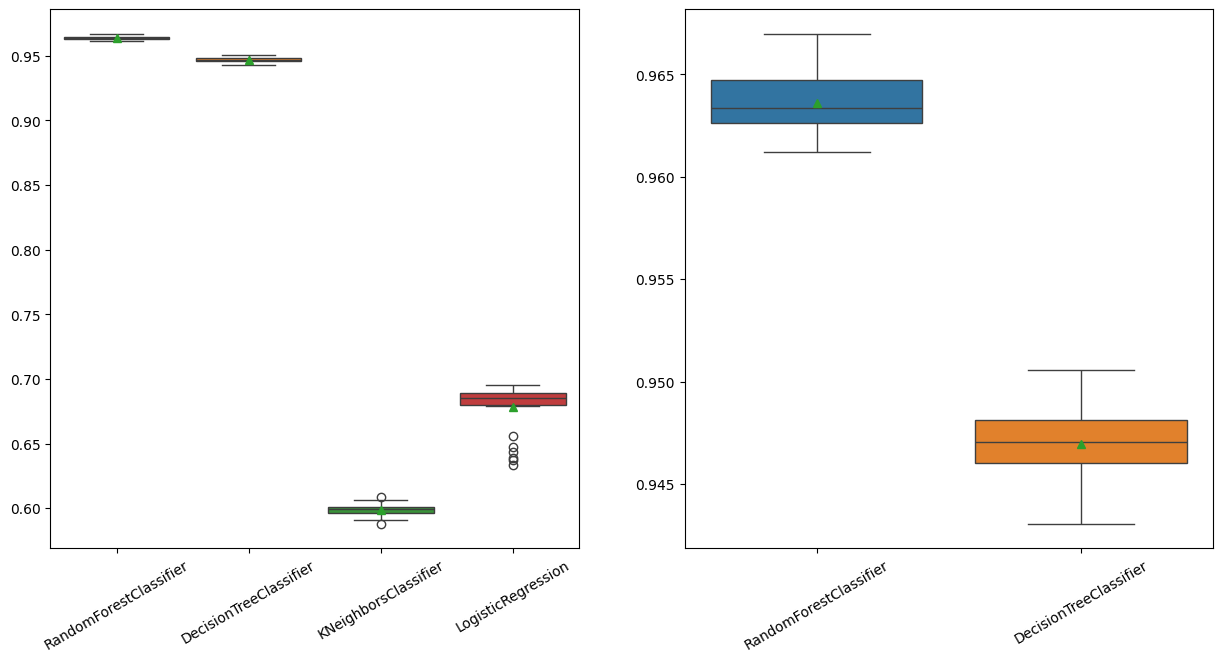

In [74]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from numpy import delete, std, mean

cat_without_target = delete(categorical_ix,-1) # Eliminamos la caracteristica Class de la lista de categoricas, esto para poder realizar un procesamiento especial con ella

preprocessor = ColumnTransformer(
    transformers=[
        ('ord_class', OrdinalEncoder(categories=[['Eco','Eco Plus', 'Business']]), ['Class']),
        ('ordinal', OrdinalEncoder(), cat_without_target),
    ],
    remainder='passthrough'
)

# define the data preparation and modeling pipeline
pipelines = [Pipeline(steps=[('prep',preprocessor), ('mod', m)]) for m in models]

resultados = list()
for n, p in zip(nombres, pipelines):

    #Evaluamos el modelo
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(p, df_trated, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    #Calculamos el accuracy de los resultados
    resultados.append(scores)
    print('>%s %.3f (%.3f)' % (n, mean(scores), std(scores)))# plot model performance for comparison
fig, axs = plt.subplots(1,2,figsize=(15,7))
a = sns.boxplot(data=resultados,showmeans=True, ax=axs[0])
a.set_xticklabels(nombres, rotation=30)
b = sns.boxplot(data=resultados[:2], showmeans=True, ax=axs[1])
b.set_xticklabels(nombres[:2], rotation=30)
plt.show()

Con las tecnicas aplicadas hasta el momento podemos ver una mejora en el accuracy, pero igualmente vamos a realizar una seleccion de caracteristicas y despues procesar mejor las variables numericas.
## Seleccion de Caracteristicas
Validamos las caracteristicas que tenemos, los tipos de distribuciones que siguen y demas, para poder seleccionar las mas adecuadas para el modelo separamos nuevamente las categoricas de las numericas.
### Categoricas

(103594, 4)
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


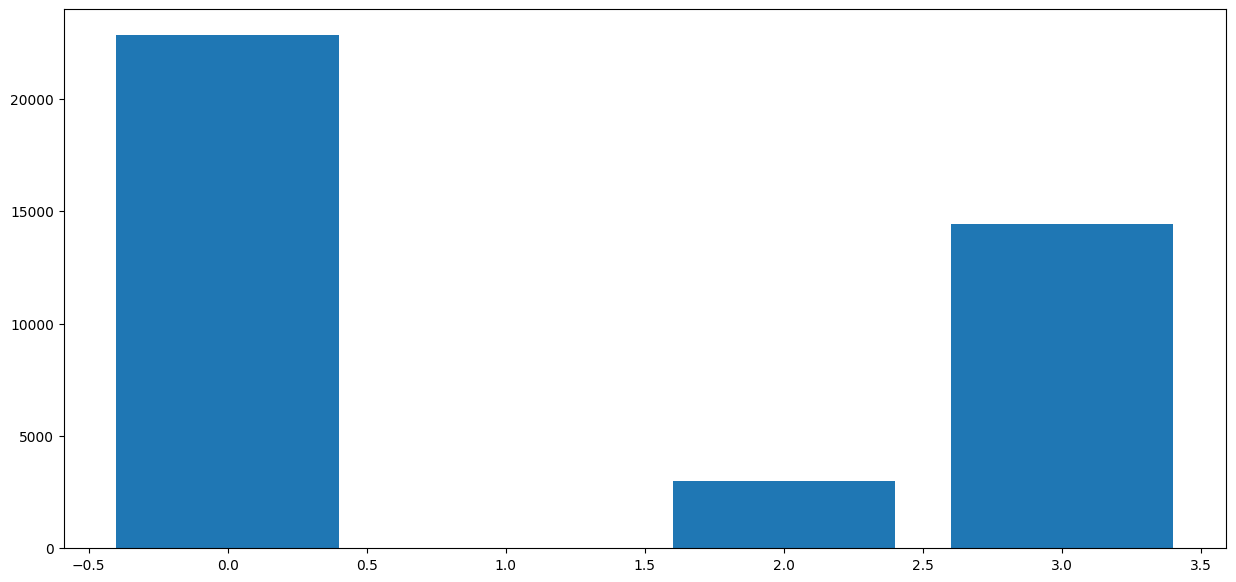

Feature Gender: 22841.336269
Feature Customer Type: 8.026807
Feature Type of Travel: 2978.253098
Feature Class: 14407.088531


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
def select_features(X_train, y_train): #test
# def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')  #k='all'; k=4
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    # X_test_fs = fs.transform(X_test)
    # return X_train_fs, X_test_fs, fs   #Devolvemos tb el objeto para conocer el índice de dependencia con la target
    return X_train_fs, fs   #Devolvemos tb el objeto para conocer el índice de dependencia con la target

# prepare target
def prepare_targets(y_train):
# def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    # y_test_enc = le.transform(y_test)
    # return y_train_enc, y_test_enc
    return y_train_enc


df_procesado = preprocessor.fit_transform(df_trated[categorical_ix])
print(df_procesado.shape)
# X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
y_process = prepare_targets(y)

print(categorical_ix)
fig, axs = plt.subplots(figsize=(15,7))
X_train_fs, fs = select_features(df_procesado, y_process)
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (list(categorical_ix)[i], fs.scores_[i]))
# plot the scores

De esta imagen podemos observar, las variables 'Gender' y 'Class' son mas relavantes a la hora de saber el nivel de satisfaccion de los usuarios, por ende tomaremos esas dos mas abajo, dentro del pipeline del transformador de columnas.
### Numericas

(103594, 20)
mutual_info_classif
Feature 0 Unnamed: 0: 0.000000
Feature 1 id: 0.154645
Feature 2 Age: 0.046542
Feature 3 Flight Distance: 0.060519
Feature 4 Inflight wifi service: 0.163795
Feature 5 Departure/Arrival time convenient: 0.001957
Feature 6 Ease of Online booking: 0.056440
Feature 7 Gate location: 0.015361
Feature 8 Food and drink: 0.026786
Feature 9 Online boarding: 0.214120
Feature 10 Seat comfort: 0.080930
Feature 11 Inflight entertainment: 0.095431
Feature 12 On-board service: 0.059698
Feature 13 Leg room service: 0.064949
Feature 14 Baggage handling: 0.046178
Feature 15 Checkin service: 0.034562
Feature 16 Inflight service: 0.042976
Feature 17 Cleanliness: 0.053609
Feature 18 Departure Delay in Minutes: 0.002439
Feature 19 Arrival Delay in Minutes: 0.006576
f_classif
Feature 0 Unnamed: 0: 2.146520
Feature 1 id: 19.391360
Feature 2 Age: 1982.685800
Feature 3 Flight Distance: 10164.144626
Feature 4 Inflight wifi service: 9099.690101
Feature 5 Departure/Arrival time conve

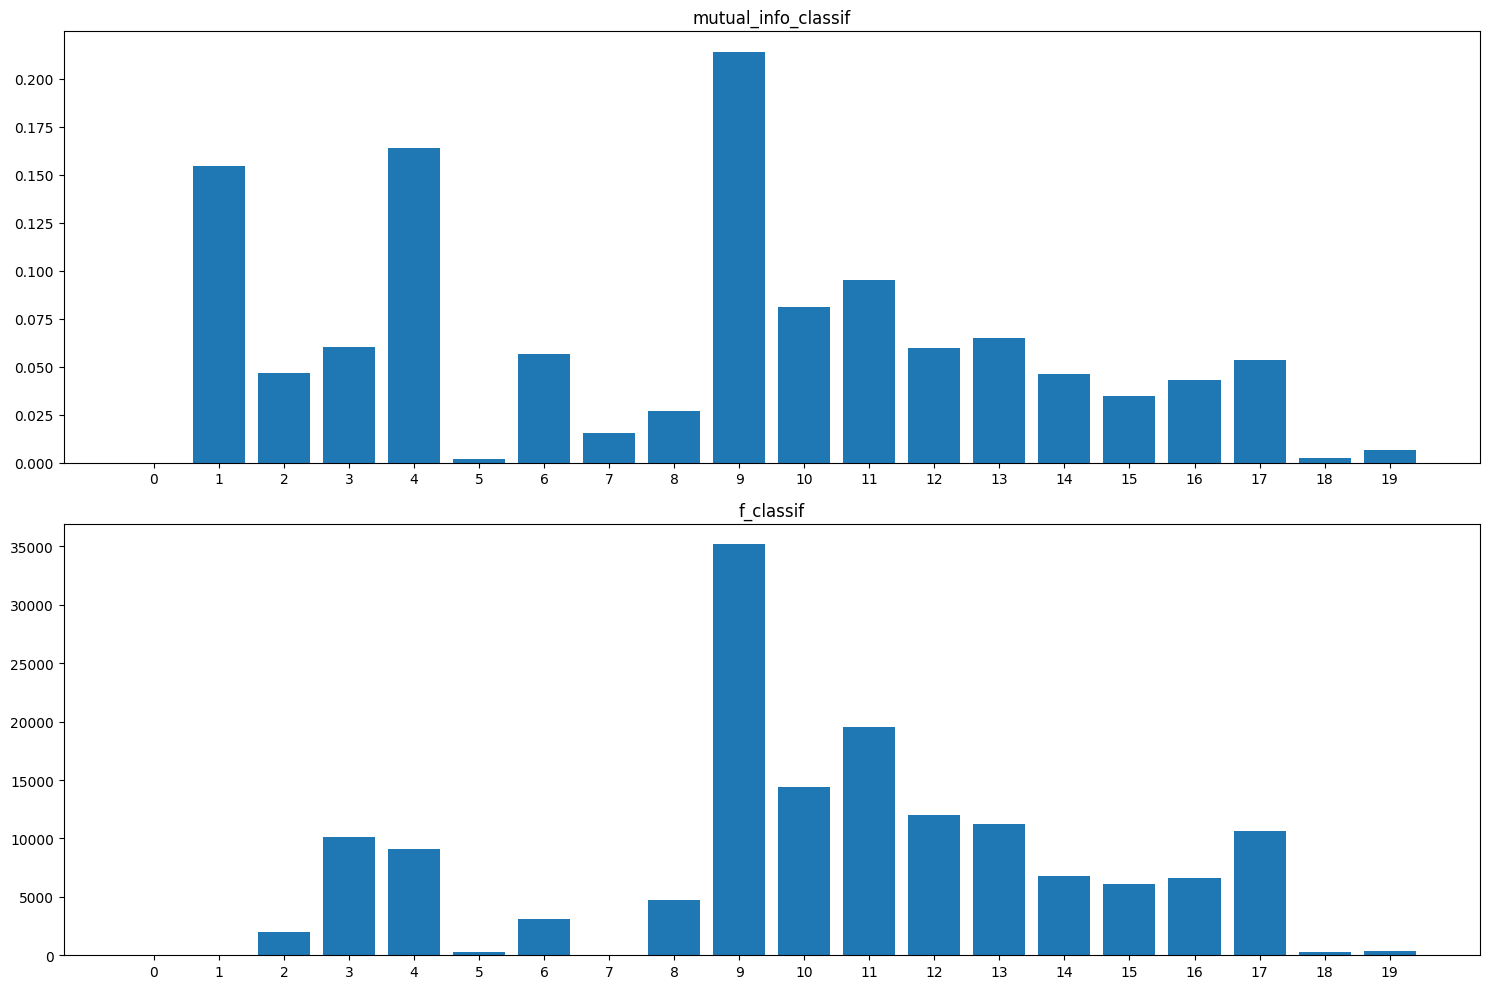

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif

# feature selection
def select_features(X_train, y_train, funct, k): #test
# def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=funct, k=k)  #k='all'; k=4
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    # X_test_fs = fs.transform(X_test)
    # return X_train_fs, X_test_fs, fs   #Devolvemos tb el objeto para conocer el índice de dependencia con la target
    return X_train_fs, fs   #Devolvemos tb el objeto para conocer el índice de dependencia con la target

# prepare target
def prepare_targets(y_train):
# def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    # y_test_enc = le.transform(y_test)
    # return y_train_enc, y_test_enc
    return y_train_enc

df_procesado = df_trated[numerical_ix]
print(df_procesado.shape)
# X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
y_process = prepare_targets(y)
fig, axs = plt.subplots(2,1,figsize=(15,10))
for i, funct in enumerate([mutual_info_classif, f_classif]):
    print(funct.__name__)
    X_train_fs, fs = select_features(df_procesado, y_process, funct, 'all')
    axs[i].bar([i for i in range(len(fs.scores_))], fs.scores_)
    axs[i].set_title(funct.__name__)
    axs[i].set_xticks(range(len(fs.scores_)))
    
    for i in range(len(fs.scores_)):
        print('Feature %d %s: %f' % (i, list(numerical_ix)[i], fs.scores_[i]))
plt.tight_layout()
plt.show()
# plot the scores

De esta grafica podemos ver como hay una completa independencia entre varias de las caracteristicas(0, 1 y 7) con la target gracias a la funcion f_classif corriendo el test de ANOVA, asi como otras con una dependencia muy baja como los son la 5, 18 y 19. Por otra parte, tambien observamos una fuerte relacion de dependencia entre la columna 9 para ambas funciones estadisticas. Realizaremos una indagacion mas profunda para determianr correctamente cual seria un buen numero de variables a utilizar

In [18]:
df_procesado = df_trated[numerical_ix]
print(df_procesado.shape)
num_features = [i+1 for i in range(df_procesado.shape[1])]

results = {}
# Probamos para cada k de caracteristicas de 1 a 20(total de caracteristicas numericas)
for k in range(1, len(num_features)+1):
    print(f"Seleccion de {k} caracteristicas")
    # probamos ambas funciones de score
    fss = [SelectKBest(score_func=f_classif, k=k), SelectKBest(score_func=mutual_info_classif, k=k)]
    for fs in fss:
        pipelines = [Pipeline(steps=[('selector',fs), ('mod', m)]) for m in models]
        name_fs = fs.score_func.__name__
        for p in pipelines:
            name_p = p.steps[1][1].__class__.__name__
            # define the evaluation model
            cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
            # evaluate the model
            scores = cross_val_score(p, df_procesado, y_process, scoring='accuracy', cv=cv, n_jobs=-1)

            if name_p not in results:
                results[name_p] = {}

            if name_fs not in results[name_p]:
                results[name_p][name_fs] = []

            results[name_p][name_fs].append(scores)
            # summarize the results
            print('>%d %s %s %.3f (%.3f)' % (k, name_fs, name_p, mean(scores), std(scores)))

(103594, 20)
Seleccion de 1 caracteristicas
>1 f_classif RandomForestClassifier 0.790 (0.004)
>1 f_classif DecisionTreeClassifier 0.790 (0.004)
>1 f_classif KNeighborsClassifier 0.787 (0.013)
>1 f_classif LogisticRegression 0.788 (0.004)
>1 mutual_info_classif RandomForestClassifier 0.790 (0.004)
>1 mutual_info_classif DecisionTreeClassifier 0.790 (0.004)
>1 mutual_info_classif KNeighborsClassifier 0.787 (0.013)
>1 mutual_info_classif LogisticRegression 0.788 (0.004)
Seleccion de 2 caracteristicas
>2 f_classif RandomForestClassifier 0.820 (0.003)
>2 f_classif DecisionTreeClassifier 0.820 (0.003)
>2 f_classif KNeighborsClassifier 0.790 (0.027)
>2 f_classif LogisticRegression 0.794 (0.004)
>2 mutual_info_classif RandomForestClassifier 0.822 (0.004)
>2 mutual_info_classif DecisionTreeClassifier 0.822 (0.004)
>2 mutual_info_classif KNeighborsClassifier 0.809 (0.008)
>2 mutual_info_classif LogisticRegression 0.769 (0.004)
Seleccion de 3 caracteristicas
>3 f_classif RandomForestClassifier 0.

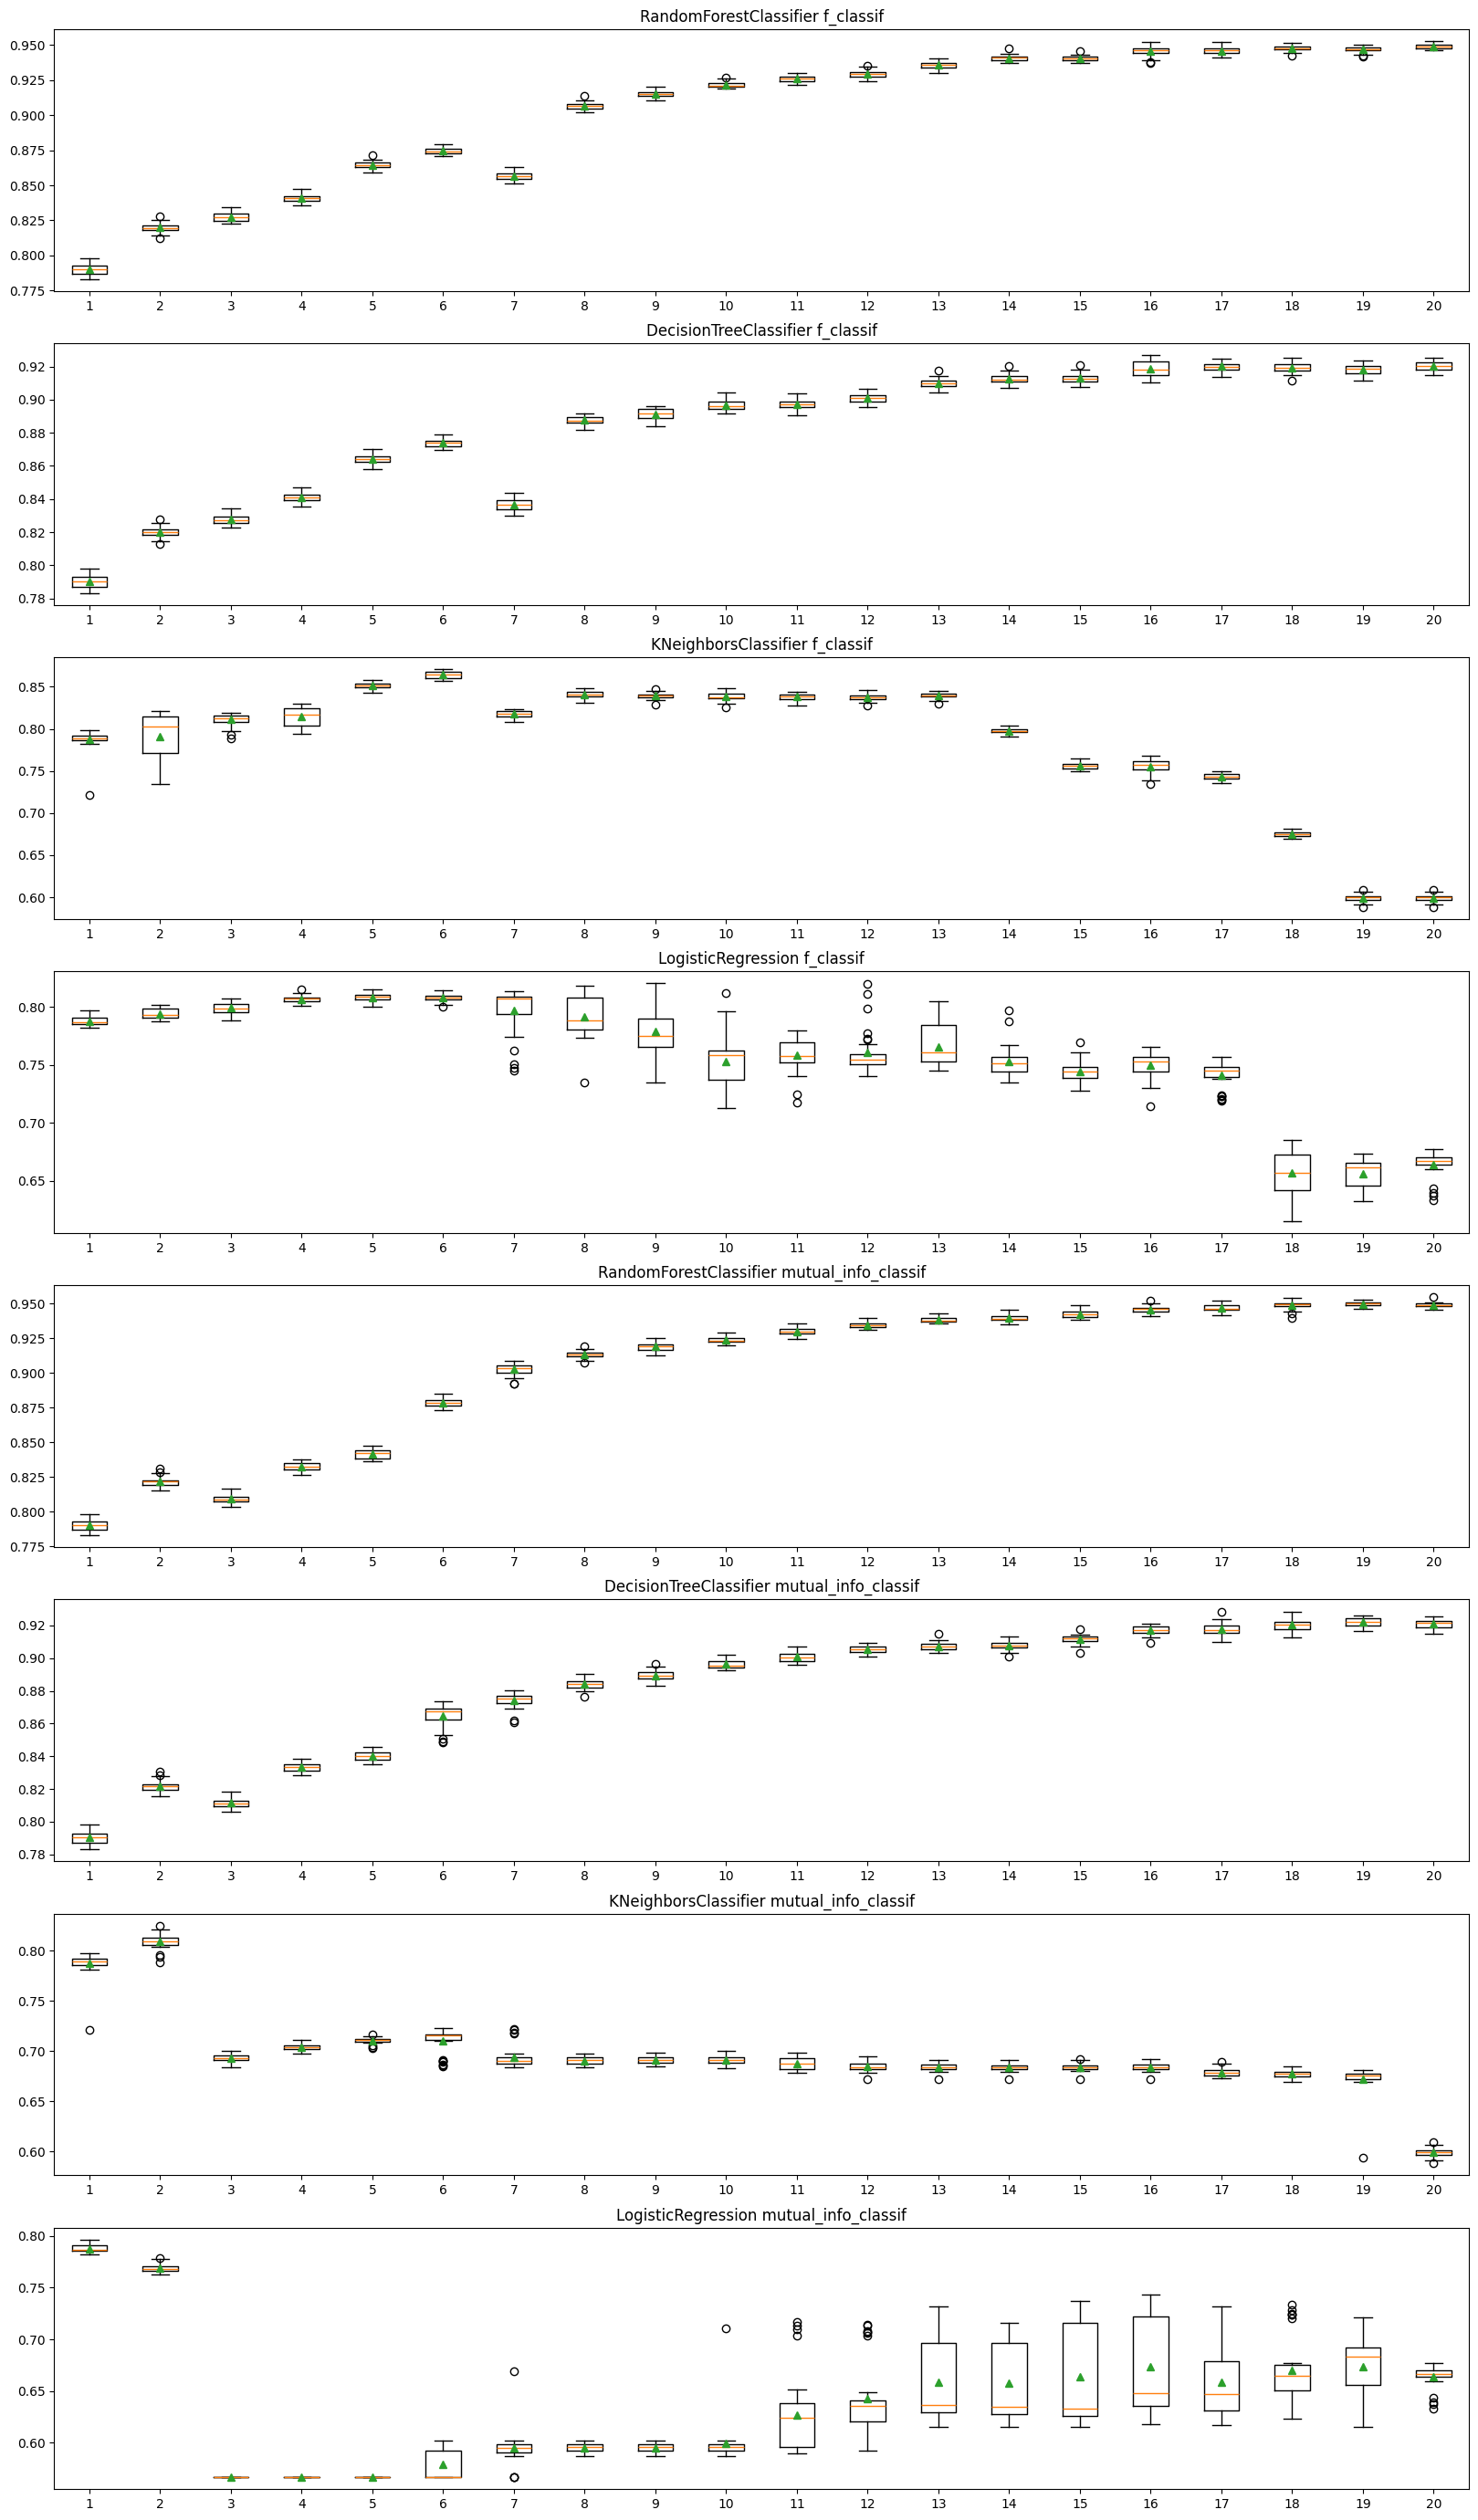

In [19]:
# plot model performance for comparison
fig, axs = plt.subplots(8,1,figsize=(20,35))
contador = 0
for name_fs in ["f_classif", "mutual_info_classif"]:
    for j, name_p in enumerate(results):
        axs[contador].boxplot(results[name_p][name_fs], showmeans=True)
        axs[contador].set_title(name_p + " " + name_fs)
        contador += 1

Hacemos un acercamiento a las ultimas 7 cajas de cada variable para visualizar mejor

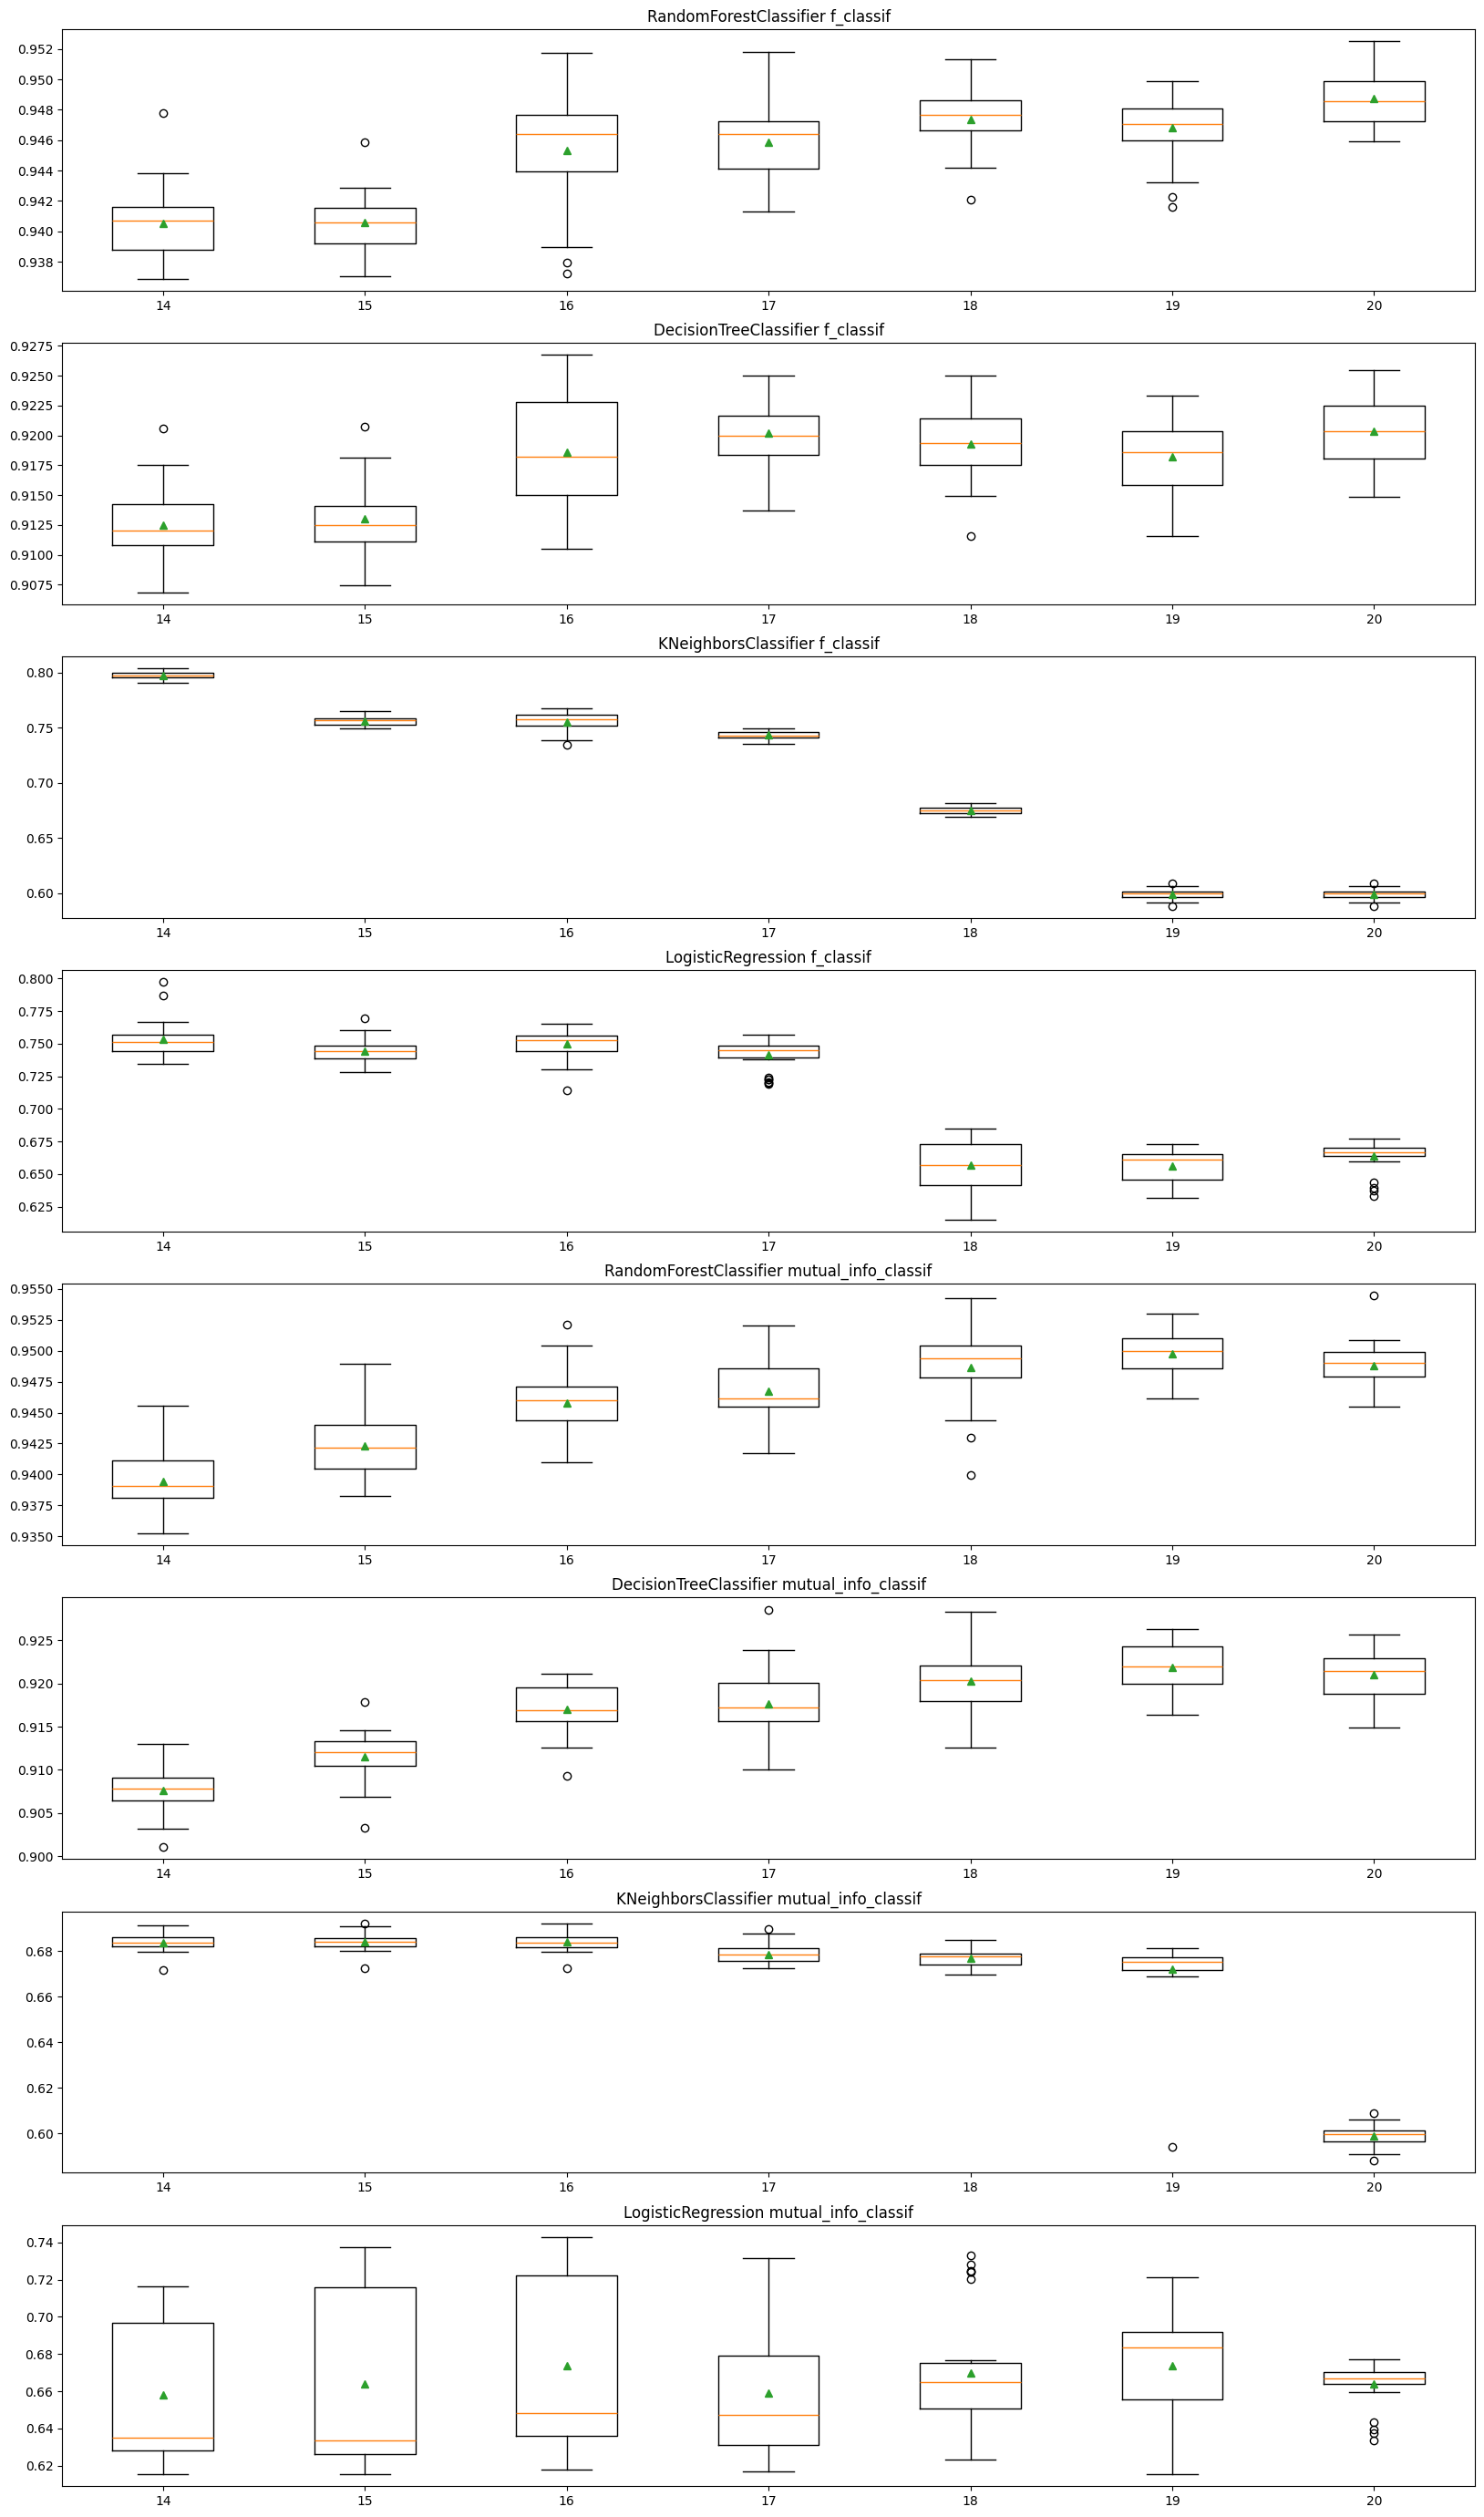

In [20]:
# plot model performance for comparison
fig, axs = plt.subplots(8,1,figsize=(20,35))
contador = 0
for name_fs in ["f_classif", "mutual_info_classif"]:
    for j, name_p in enumerate(results):
        axs[contador].boxplot(results[name_p][name_fs][-7:], showmeans=True)
        axs[contador].set_title(name_p + " " + name_fs)
        axs[contador].set_xticklabels(range(14,21))
        contador += 1

Debido a que las graficas nos generan dudas en cuanto a la cantidad correcta de caracteristicas a seleccionar, probamos tambien el metodo de GridSearch, esto principalmente ya que conocemos que algunos de los atributos que tenemos son identificadores por registro y existe una posibilidad muy alta de un sobreentrenamiento, representandose en un score bastante algo.
### Grid Search
Para este caso decidimos hacer el test unicamente con ANOVA, pero igual mantenemos las pruebas sobre 3 de los 4 algoritmos

In [21]:
from sklearn.model_selection import GridSearchCV

df_procesado = df_trated[numerical_ix]
print(df_procesado.shape)
num_features = [i+1 for i in range(df_procesado.shape[1])]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
fs = SelectKBest(score_func=f_classif)

model = LogisticRegression()
pipeline = Pipeline(steps=[('anova',fs), ('mod', model)])

print(model.__class__.__name__)
# define the grid
grid = dict()

grid['anova__k'] = [i+1 for i in range(df_procesado.shape[1])]

search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
results_search = search.fit(df_procesado, y)
print('Best Mean Accuracy: %.3f' % results_search.best_score_)
print('Best Config: %s' % results_search.best_params_)

means = results_search.cv_results_['mean_test_score']
params = results_search.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

(103594, 20)
LogisticRegression
Best Mean Accuracy: 0.808
Best Config: {'anova__k': 5}
>0.788 with: {'anova__k': 1}
>0.794 with: {'anova__k': 2}
>0.799 with: {'anova__k': 3}
>0.807 with: {'anova__k': 4}
>0.808 with: {'anova__k': 5}
>0.808 with: {'anova__k': 6}
>0.797 with: {'anova__k': 7}
>0.792 with: {'anova__k': 8}
>0.779 with: {'anova__k': 9}
>0.753 with: {'anova__k': 10}
>0.758 with: {'anova__k': 11}
>0.761 with: {'anova__k': 12}
>0.766 with: {'anova__k': 13}
>0.753 with: {'anova__k': 14}
>0.744 with: {'anova__k': 15}
>0.750 with: {'anova__k': 16}
>0.741 with: {'anova__k': 17}
>0.657 with: {'anova__k': 18}
>0.656 with: {'anova__k': 19}
>0.664 with: {'anova__k': 20}


In [22]:
from sklearn.model_selection import GridSearchCV

df_procesado = df_trated[numerical_ix]
print(df_procesado.shape)
num_features = [i+1 for i in range(df_procesado.shape[1])]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
fs = SelectKBest(score_func=f_classif)

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('anova',fs), ('mod', model)])

# define the grid
grid = dict()

print(model.__class__.__name__)
grid['anova__k'] = [i+1 for i in range(df_procesado.shape[1])]

search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
results_search = search.fit(df_procesado, y)
print('Best Mean Accuracy: %.3f' % results_search.best_score_)
print('Best Config: %s' % results_search.best_params_)

means = results_search.cv_results_['mean_test_score']
params = results_search.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

(103594, 20)
KNeighborsClassifier
Best Mean Accuracy: 0.864
Best Config: {'anova__k': 6}
>0.787 with: {'anova__k': 1}
>0.790 with: {'anova__k': 2}
>0.811 with: {'anova__k': 3}
>0.815 with: {'anova__k': 4}
>0.852 with: {'anova__k': 5}
>0.864 with: {'anova__k': 6}
>0.818 with: {'anova__k': 7}
>0.841 with: {'anova__k': 8}
>0.839 with: {'anova__k': 9}
>0.838 with: {'anova__k': 10}
>0.838 with: {'anova__k': 11}
>0.837 with: {'anova__k': 12}
>0.839 with: {'anova__k': 13}
>0.797 with: {'anova__k': 14}
>0.756 with: {'anova__k': 15}
>0.755 with: {'anova__k': 16}
>0.743 with: {'anova__k': 17}
>0.675 with: {'anova__k': 18}
>0.599 with: {'anova__k': 19}
>0.599 with: {'anova__k': 20}


In [23]:
from sklearn.model_selection import GridSearchCV

df_procesado = df_trated[numerical_ix]
print(df_procesado.shape)
num_features = [i+1 for i in range(df_procesado.shape[1])]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
fs = SelectKBest(score_func=f_classif)

model = RandomForestClassifier()
pipeline = Pipeline(steps=[('anova',fs), ('mod', model)])

print(model.__class__.__name__)
# define the grid
grid = dict()

grid['anova__k'] = [i+1 for i in range(df_procesado.shape[1])]

search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
results_search = search.fit(df_procesado, y)
print('Best Mean Accuracy: %.3f' % results_search.best_score_)
print('Best Config: %s' % results_search.best_params_)

means = results_search.cv_results_['mean_test_score']
params = results_search.cv_results_['params']
for mean, param in zip(means, params):
    print('>%.3f with: %r' % (mean, param))

(103594, 20)
RandomForestClassifier
Best Mean Accuracy: 0.949
Best Config: {'anova__k': 20}
>0.790 with: {'anova__k': 1}
>0.820 with: {'anova__k': 2}
>0.827 with: {'anova__k': 3}
>0.841 with: {'anova__k': 4}
>0.864 with: {'anova__k': 5}
>0.875 with: {'anova__k': 6}
>0.857 with: {'anova__k': 7}
>0.906 with: {'anova__k': 8}
>0.915 with: {'anova__k': 9}
>0.921 with: {'anova__k': 10}
>0.926 with: {'anova__k': 11}
>0.929 with: {'anova__k': 12}
>0.935 with: {'anova__k': 13}
>0.941 with: {'anova__k': 14}
>0.940 with: {'anova__k': 15}
>0.945 with: {'anova__k': 16}
>0.946 with: {'anova__k': 17}
>0.947 with: {'anova__k': 18}
>0.947 with: {'anova__k': 19}
>0.949 with: {'anova__k': 20}


Comprobamos que efectivamente el algoritmo es mas preciso si se incluyen la totalidad de las columnas para el RanmdomForest(comportamiento extraño conociendo que hay minimo dos columnas que se comportan como identificadores y varian para cada una de las instancias, esto puede deberse a un sobreajuste de los datos), tambien encontramos comportamientos mejores en los algoritmos de KNN y Logistic Regression. Revisaremos ahora la importancia de las caracteristicas.

In [24]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset

df_procesado = df_trated[numerical_ix]
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)  
rfe.fit(df_procesado,y)
X_transf = rfe.transform(df_procesado)
print(df_procesado, df_procesado.shape)
print(rfe.support_)
print(X_transf, X_transf.shape)
rfe.ranking_

#Si queremos crear un dataframe con los resultados 
df_rfe_results = []
for i in range(df_procesado.shape[1]):
    df_rfe_results.append(
        {
            "Feature names": df_procesado.columns[i],
            'Selected': rfe.support_[i],
            'rfe_ranking': rfe.ranking_[i]
        }
    )
df_rfe_results = pd.DataFrame(df_rfe_results)
df_rfe_results

        Unnamed: 0      id  Age  Flight Distance  Inflight wifi service  \
0                0   70172   13              460                      3   
1                1    5047   25              235                      3   
2                2  110028   26             1142                      2   
3                3   24026   25              562                      2   
4                4  119299   61              214                      3   
...            ...     ...  ...              ...                    ...   
103899      103899   94171   23              192                      2   
103900      103900   73097   49             2347                      4   
103901      103901   68825   30             1995                      1   
103902      103902   54173   22             1000                      1   
103903      103903   62567   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                             

,Feature names,Selected,rfe_ranking
0,Unnamed: 0,True,1
1,id,True,1
2,Age,False,4
3,Flight Distance,True,1
4,Inflight wifi service,True,1
5,Departure/Arrival time convenient,False,3
6,Ease of Online booking,False,13
7,Gate location,False,6
8,Food and drink,False,7
9,Online boarding,True,1


Evidenciando como por alguna razon el indentificador llamado Unnamed: 0 es marcado como casilla de selección, vamos a revisar que datos tiene, para ellos partimos del conjunto inicial.

In [25]:
print("Total columnas: ", df_procesado.shape)
print("Numericas: ", df_procesado.select_dtypes(include=['int64','float64']).columns)
for c in df_procesado:
    lista = df_procesado[c].unique()
    if c == 'Unnamed: 0' or c == 'id':
        print(f"{c}:", len(lista))

Total columnas:  (103594, 20)
Numericas:  Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')
Unnamed: 0: 103594
id: 103594


Gracias a lo anterior, decidimos eliminar manualmente esas dos columnas que no aportan nada al modelo y volver a probar el seleccionador de caracteristicas

In [21]:
numerical_without_ids = delete(numerical_ix,0)
numerical_without_ids = delete(numerical_without_ids,0)
numerical_without_ids

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [27]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset

df_procesado = df_trated[numerical_without_ids]
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)  
rfe.fit(df_procesado,y)
X_transf = rfe.transform(df_procesado)
print(df_procesado, df_procesado.shape)
print(rfe.support_)
print(X_transf, X_transf.shape)
rfe.ranking_

#Si queremos crear un dataframe con los resultados 
df_rfe_results = []
for i in range(df_procesado.shape[1]):
    df_rfe_results.append(
        {
            "Feature names": df_procesado.columns[i],
            'Selected': rfe.support_[i],
            'rfe_ranking': rfe.ranking_[i]
        }
    )
df_rfe_results = pd.DataFrame(df_rfe_results)
df_rfe_results

        Age  Flight Distance  Inflight wifi service  \
0        13              460                      3   
1        25              235                      3   
2        26             1142                      2   
3        25              562                      2   
4        61              214                      3   
...     ...              ...                    ...   
103899   23              192                      2   
103900   49             2347                      4   
103901   30             1995                      1   
103902   22             1000                      1   
103903   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                      

,Feature names,Selected,rfe_ranking
0,Age,True,1
1,Flight Distance,True,1
2,Inflight wifi service,True,1
3,Departure/Arrival time convenient,False,4
4,Ease of Online booking,False,13
5,Gate location,False,3
6,Food and drink,False,5
7,Online boarding,True,1
8,Seat comfort,False,11
9,Inflight entertainment,True,1


Volvemos a hacer un analisis sobre de seleccion de caracteristicas numericas.

In [32]:
df_procesado = df_trated[numerical_without_ids]
print(df_procesado.shape)
num_features = [i+1 for i in range(df_procesado.shape[1])]

results = {}
# Probamos para cada k de caracteristicas de 1 a 20(total de caracteristicas numericas)
for k in range(1, len(num_features)+1):
    print(f"Seleccion de {k} caracteristicas")
    # probamos ambas funciones de score
    fss = [SelectKBest(score_func=f_classif, k=k), SelectKBest(score_func=mutual_info_classif, k=k)]
    for fs in fss:
        pipelines = [Pipeline(steps=[('selector',fs), ('mod', m)]) for m in models]
        name_fs = fs.score_func.__name__
        for p in pipelines:
            name_p = p.steps[1][1].__class__.__name__
            # define the evaluation model
            cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
            # evaluate the model
            scores = cross_val_score(p, df_procesado, y_process, scoring='accuracy', cv=cv, n_jobs=-1)

            if name_p not in results:
                results[name_p] = {}

            if name_fs not in results[name_p]:
                results[name_p][name_fs] = []

            results[name_p][name_fs].append(scores)
            # summarize the results
            print('>%d %s %s %.3f (%.3f)' % (k, name_fs, name_p, mean(scores), std(scores)))

(103594, 18)
Seleccion de 1 caracteristicas
>1 f_classif RandomForestClassifier 0.790 (0.004)
>1 f_classif DecisionTreeClassifier 0.790 (0.004)
>1 f_classif KNeighborsClassifier 0.787 (0.013)
>1 f_classif LogisticRegression 0.788 (0.004)
>1 mutual_info_classif RandomForestClassifier 0.790 (0.004)
>1 mutual_info_classif DecisionTreeClassifier 0.790 (0.004)
>1 mutual_info_classif KNeighborsClassifier 0.787 (0.013)
>1 mutual_info_classif LogisticRegression 0.788 (0.004)
Seleccion de 2 caracteristicas
>2 f_classif RandomForestClassifier 0.820 (0.003)
>2 f_classif DecisionTreeClassifier 0.820 (0.003)
>2 f_classif KNeighborsClassifier 0.790 (0.027)
>2 f_classif LogisticRegression 0.794 (0.004)
>2 mutual_info_classif RandomForestClassifier 0.822 (0.004)
>2 mutual_info_classif DecisionTreeClassifier 0.822 (0.004)
>2 mutual_info_classif KNeighborsClassifier 0.809 (0.008)
>2 mutual_info_classif LogisticRegression 0.769 (0.004)
Seleccion de 3 caracteristicas
>3 f_classif RandomForestClassifier 0.

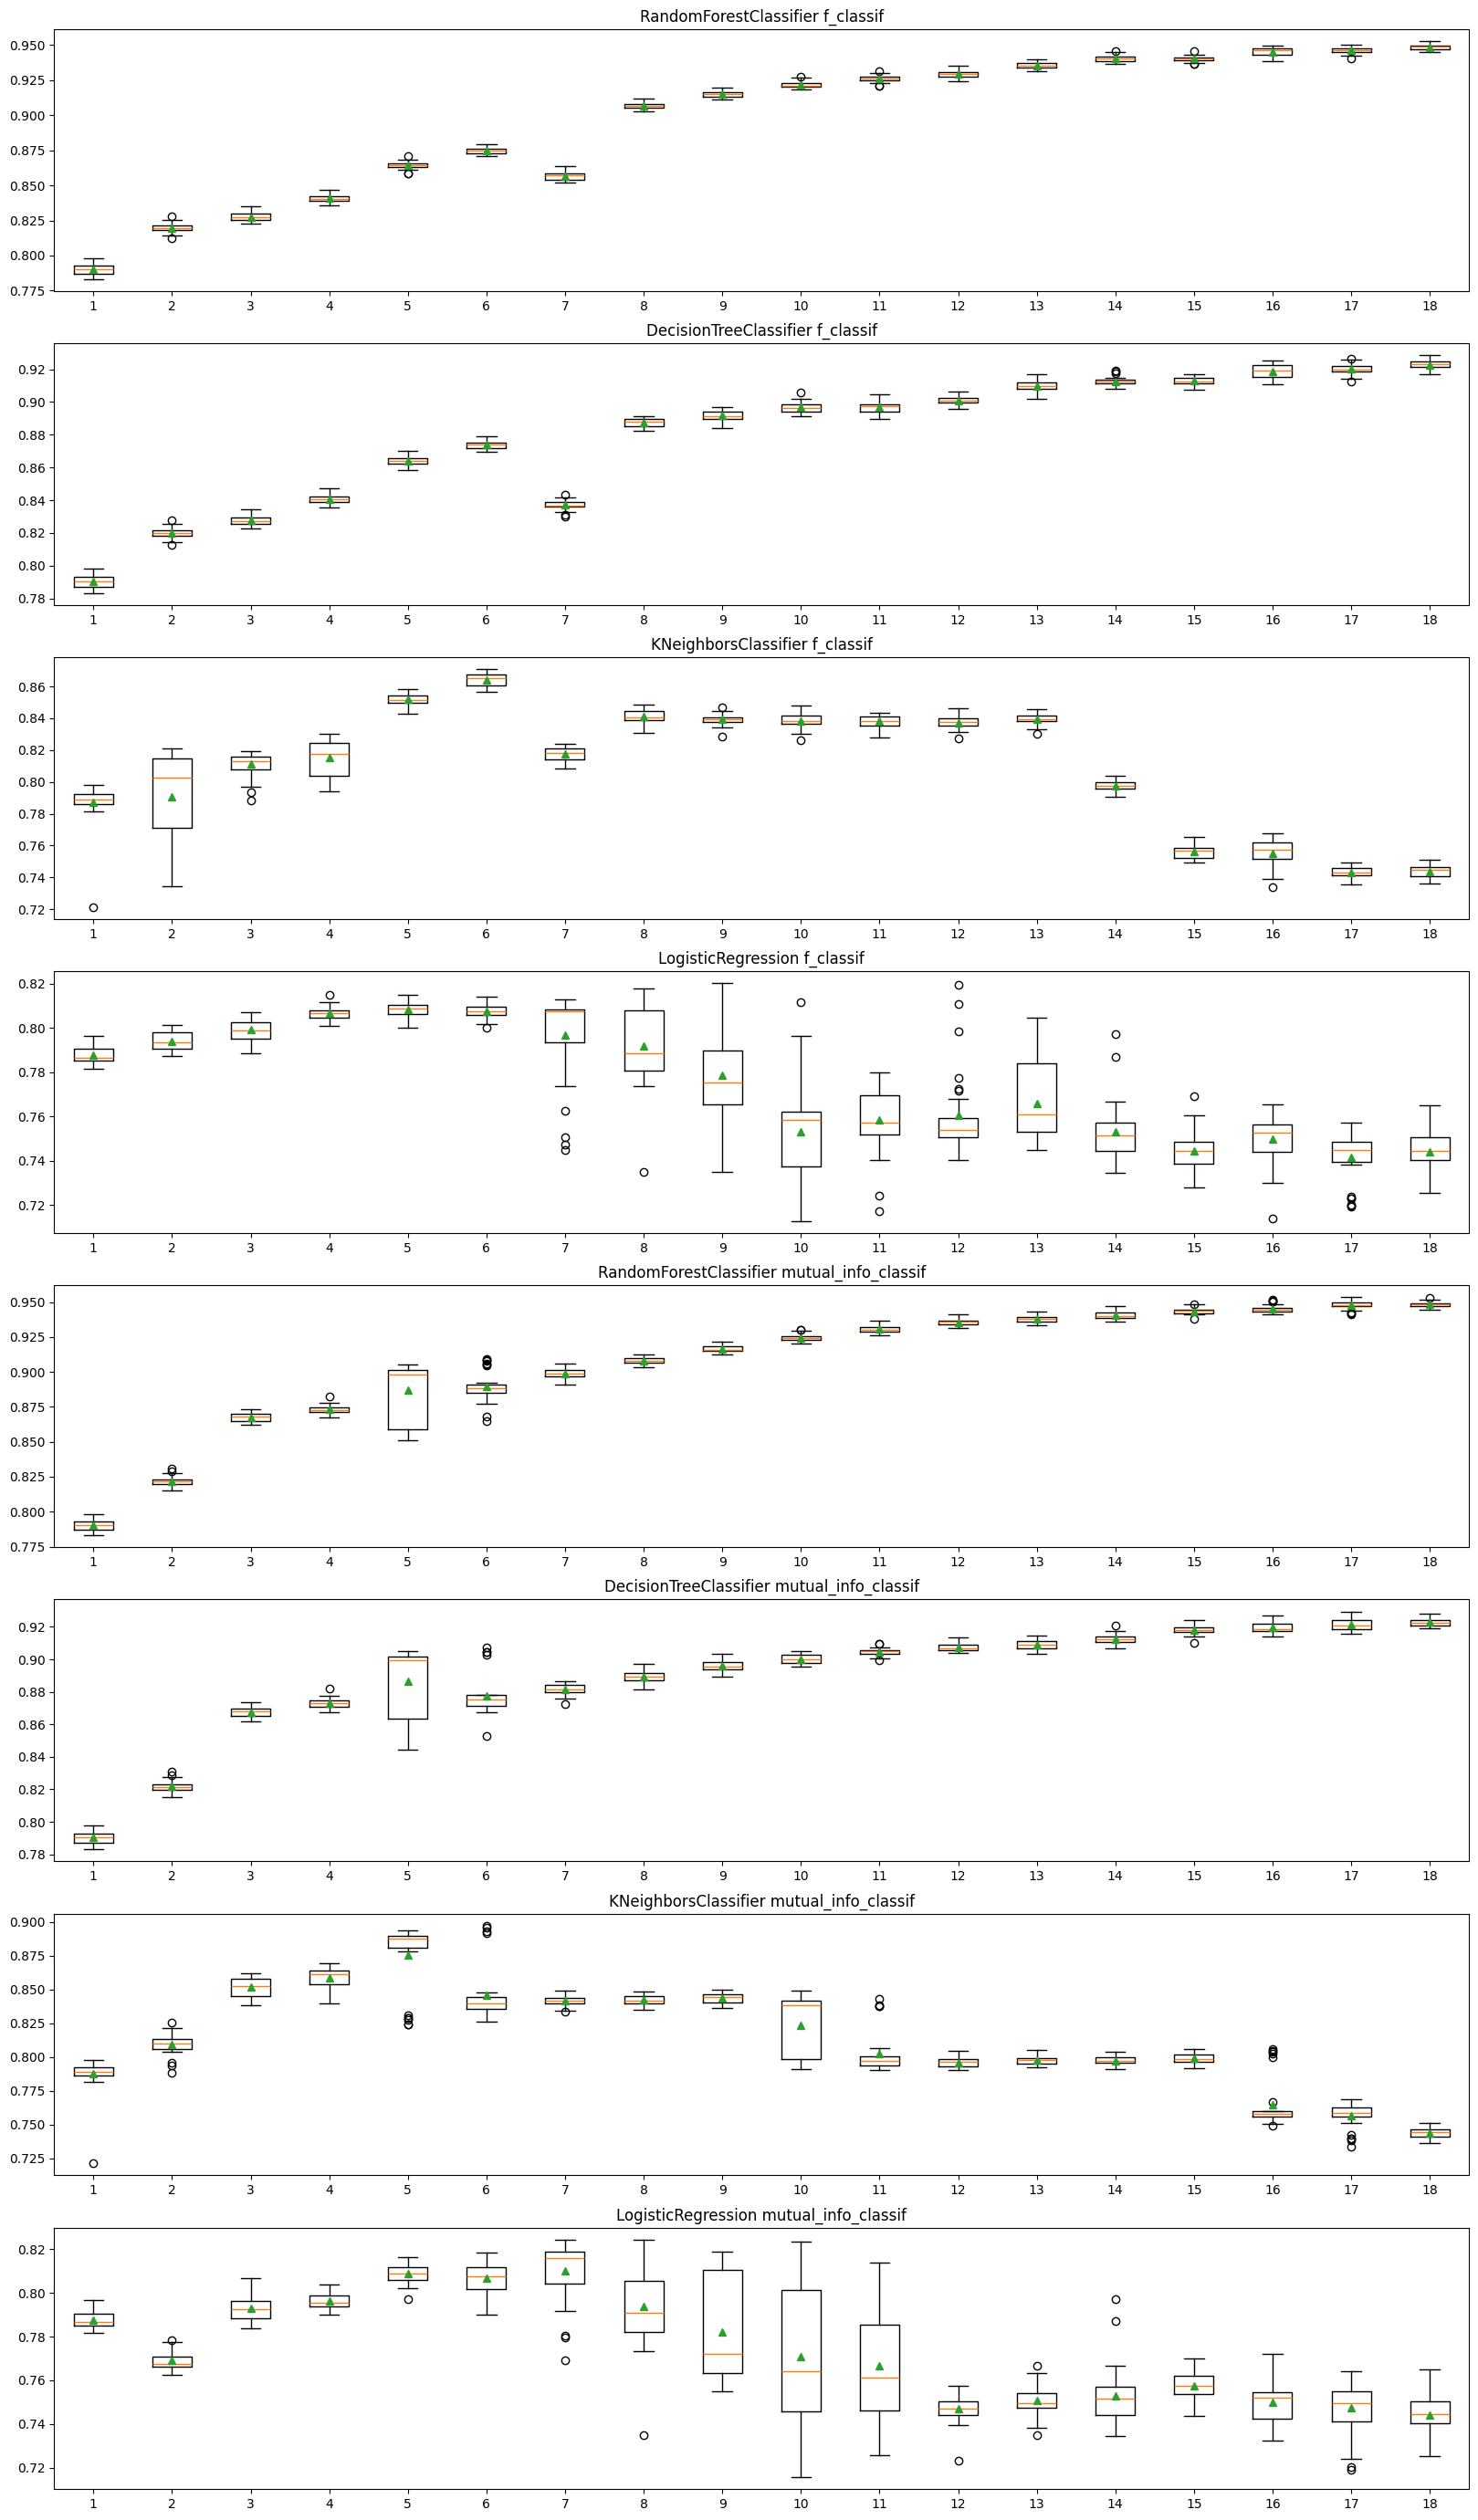

In [33]:
# plot model performance for comparison
fig, axs = plt.subplots(8,1,figsize=(20,35))
contador = 0
for name_fs in ["f_classif", "mutual_info_classif"]:
    for j, name_p in enumerate(results):
        axs[contador].boxplot(results[name_p][name_fs], showmeans=True)
        axs[contador].set_title(name_p + " " + name_fs)
        contador += 1

Ya contamos con el orden de categorias de interes, entonces procedemos a aplicar validar outliers y despues validaremos las carecteristicas que realmente escogeremos
## Validacion de outliers
Empezamos visualizando el tipo de distribuciones que manejan los datos.

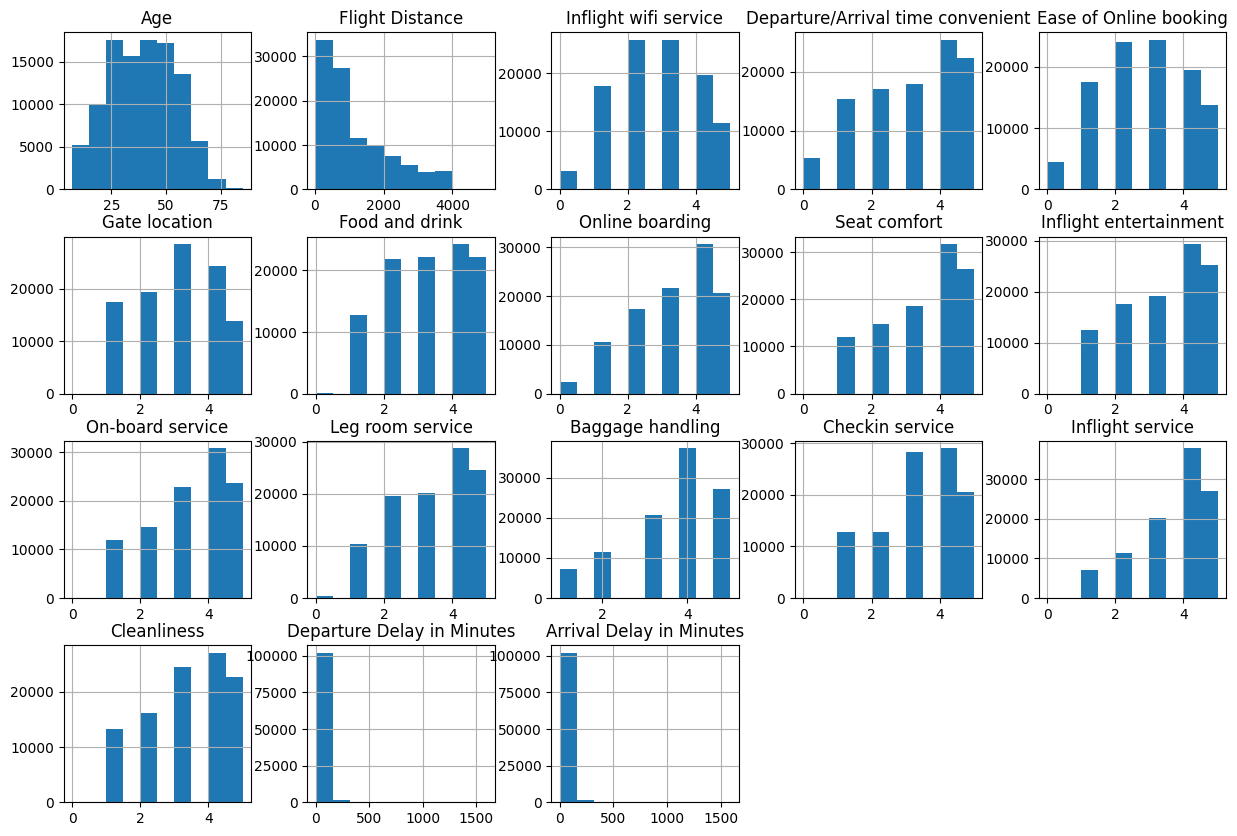

In [34]:
df_trated[numerical_without_ids].hist(layout=(4,5),figsize=(15,10))
plt.show()

In [55]:
for i in numerical_without_ids:
    data_mean, data_std = mean(df_trated[i]), std(df_trated[i])
    # define outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # Example of identifying outliers using the limits on the data.
    outliers = [x for x in df_trated[i] if x < lower or x > upper]
    if len(outliers) > 0:
        print(i)
        print("lower", lower)
        print("upper", upper)
        #ordenamos los outliers de forma descendente
        outliers.sort(reverse=True)
        print(outliers)
        print(len(outliers)) 

Age
lower -5.958690941419739
upper 84.71962304173442
[85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85]
17
Flight Distance
lower -1802.5520617432028
upper 4181.2024662067815
[4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4963, 4817, 4817, 4817, 4817, 4817, 4502, 4502, 4502, 4502, 4502, 4502, 4502, 4502, 4502, 4502, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243, 4243]
58
Inflight service
lower 0.11396903765295896
upper 7.167553058221319
[0, 0, 0]
3
Departure Delay in Minutes
lower -99.60172006279223
upper 129.09759820245282
[1592, 1305, 1017, 978, 933, 930, 921, 859, 853, 750, 748, 729, 726, 724, 692, 652, 626, 610, 600, 595, 579, 570, 566, 559, 537, 531, 519, 514, 505, 503, 503, 501, 496, 491, 480, 480, 472, 469, 465, 463, 460, 459, 454, 454, 454, 454, 452, 452, 450, 448, 447, 446, 444, 438, 437, 437, 435, 433, 430, 4

De las graficas y los valores de outliers mostrados en la celda anterior podemos notar que de las columnas numericas, unicamente 4 tiene outliers, pero 3 de esas variables numericas no tienen distribucion normal, por ende facilmente solo podriamos acotar la columna 'Age', la cual sus outliers son unicamente las personas que tienen 85, razon por la cual consideramos que quitarlo seria en un segso de esos valores para que a la hora de pasar el conjunto de Test pueda generar problemas al no identificar usuarios de 85 años. Decidimos validar que son los otros datos que aparecen como outliers, para eso validamos por las columnas de delay que sean mayores a

In [63]:
df_m = df[(df['Arrival Delay in Minutes'] > 1000) | (df['Departure Delay in Minutes'] > 1000)]
df_m

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6744,6744,69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,...,3,4,5,4,5,3,5,1305,1280.0,satisfied
61310,61310,4903,Male,Loyal Customer,49,Business travel,Business,1959,1,1,...,4,4,4,5,4,4,4,1017,1011.0,satisfied
83741,83741,73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,...,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


Para las otras variables observamos que tanto Departure como Arrival delay in minutes tienen valores que se alejan mucho de sus rangos y observamos que son los mismos 3 registros para esas dos columnas, de los cuales tampoco hallamos un patron, asi que los consideramos atipicos y por ende decidimos eliminarlos.(Este paso se realiza en el procesamiento final)

## Normalizacion y Escalamiento
Para este paso decidimos normalizar departure y arrival delay para observar como cambian sus distribuciones.

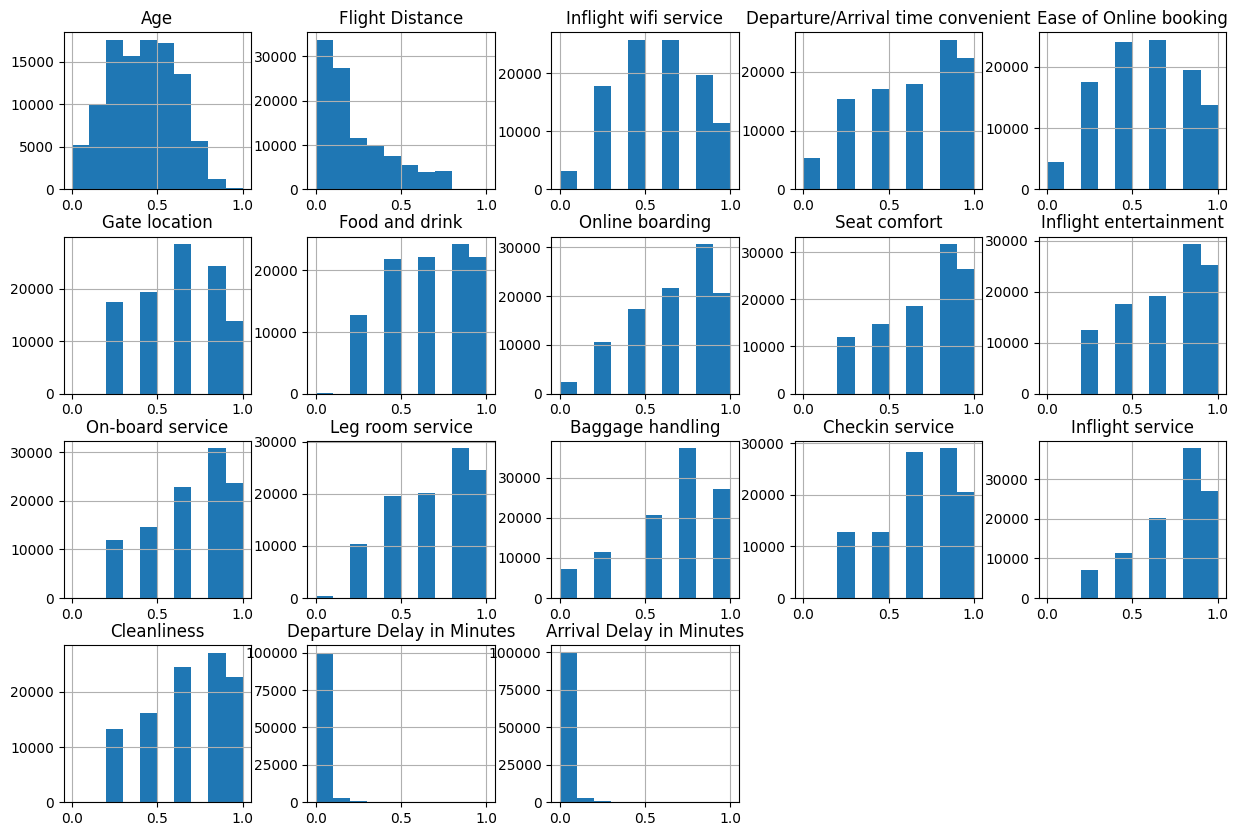

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000,103591.000000
mean,0.415133,0.233906,0.545957,0.612024,0.551403,0.595411,0.640422,0.650093,0.687952,0.671670,0.676518,0.670274,0.657917,0.660862,0.728154,0.657277,0.015041,0.015610
std,0.193760,0.201392,0.265574,0.305047,0.279788,0.255545,0.265880,0.269887,0.263779,0.266608,0.257660,0.263083,0.295265,0.253079,0.235123,0.262439,0.038301,0.039241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.423077,0.163772,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000
75%,0.564103,0.345618,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.012270,0.013402
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from sklearn.preprocessing import MinMaxScaler
df.dropna(inplace=True)
df_clean = df.dropna(axis=0, how='any')
df_clean = df_clean[(df_clean['Arrival Delay in Minutes'] < 1000) & (df_clean['Departure Delay in Minutes'] < 1000)]
label_encoder = LabelEncoder()  # OJO! LabelEncoder para la target
df_clean["satisfaction"] = label_encoder.fit_transform(df_clean["satisfaction"])
data = df_clean.select_dtypes(include=[np.number])
X, y = data.drop(columns=["satisfaction"]), data["satisfaction"]
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X[numerical_without_ids])
X_minmax = pd.DataFrame(X_minmax, columns=numerical_without_ids)
# mostramos su nueva distribución
X_minmax.hist(layout=(4,5),figsize=(15,10))
plt.show()
X_minmax.describe()

## Power Transform
Aplicamos Powertransform sobre la unica columna que es realmente normal Age para mejorar 

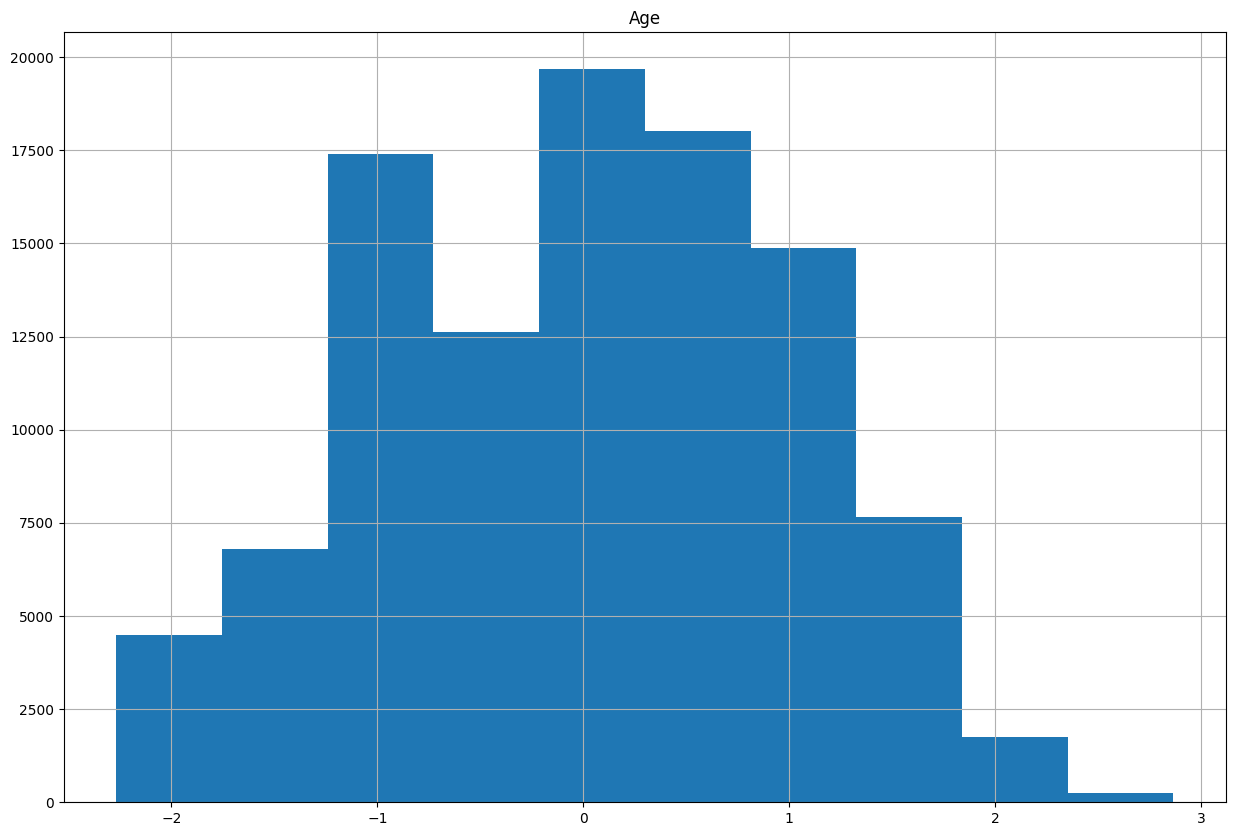

,Age
count,1.035910e+05
mean,5.753427e-16
std,1.000005e+00
min,-2.267055e+00
25%,-8.041215e-01
50%,6.536429e-02
75%,7.741206e-01
max,2.863812e+00


In [119]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
df.dropna(inplace=True)
df_clean = df.dropna(axis=0, how='any')
df_clean = df_clean[(df_clean['Arrival Delay in Minutes'] < 1000) & (df_clean['Departure Delay in Minutes'] < 1000)]
label_encoder = LabelEncoder()  # OJO! LabelEncoder para la target
df_clean["satisfaction"] = label_encoder.fit_transform(df_clean["satisfaction"])
data = df_clean.select_dtypes(include=[np.number])
X, y = data.drop(columns=["satisfaction"]), data["satisfaction"]
minmax = MinMaxScaler(feature_range=(1, 2))
X_minmax = minmax.fit_transform(X[['Age']])
# X_minmax.describe()
power = PowerTransformer(method='box-cox', standardize=True) #exclusively positive data
X_minmax = power.fit_transform(X[['Age']])

X_minmax = pd.DataFrame(X_minmax, columns=['Age'])
# mostramos su nueva distribución
X_minmax.hist(figsize=(15,10))
plt.show()
X_minmax.describe()

## Procesado completo del Modelo

>RandomForestClassifier 0.958 (0.002)
>DecisionTreeClassifier 0.938 (0.002)
>KNeighborsClassifier 0.924 (0.003)
>LogisticRegression 0.860 (0.003)


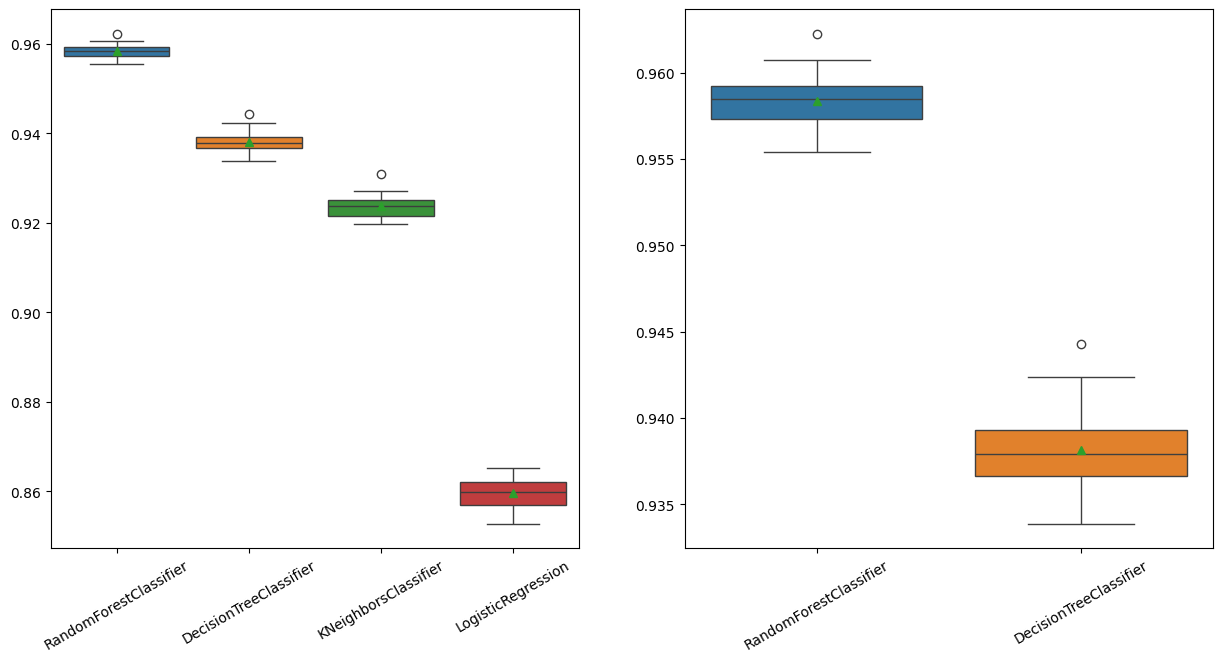

In [107]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from numpy import delete, std, mean
df = pd.read_csv('Datasets/Airplane Satisfaction/train.csv')
df_clean = df.dropna(axis=0, how='any')
# Eliminaciones de outliers
df_clean = df_clean[(df_clean['Arrival Delay in Minutes'] < 1000) & (df_clean['Departure Delay in Minutes'] < 1000)]

label_encoder = LabelEncoder()  # OJO! LabelEncoder para la target
df_clean["satisfaction"] = label_encoder.fit_transform(df_clean["satisfaction"])
df_final, y = df_clean.drop(columns=["satisfaction"]), df_clean["satisfaction"]

categorical_ix = df_final.select_dtypes(include='object').columns 
numerical_ix = df_final.select_dtypes(include=['float64','int']).columns

cat_without_class = delete(categorical_ix,-1) # Eliminamos la caracteristica Class de la lista de categoricas, esto para poder realizar un procesamiento especial con ella
numerical_without_ids = numerical_ix[3:] # Quitamos Age, Arrival Delay in Minutes y Departure Delay in Minutes

preprocessor = ColumnTransformer(
    transformers=[
        ('ord_class', OrdinalEncoder(categories=[['Eco','Eco Plus', 'Business']]), ['Class']),
        ('ordinal', OrdinalEncoder(), cat_without_class),
        ('power', PowerTransformer(method='box-cox', standardize=True), ['Age']),
        ('numerical', MinMaxScaler(), numerical_without_ids), #Aplicamos un escalado a las variables numericas
    ],
    remainder='drop'
)

selector = ColumnTransformer(
    transformers=[
        ('categorical', SelectKBest(score_func=chi2, k=2), [0,1,2,3]),
    ],
    remainder='passthrough'
)

# define the data preparation and modeling pipeline
pipelines = [Pipeline(steps=[('prep', preprocessor), ('sel', selector), ('mod', m)]) for m in models]

resultados = list()
for n, p in zip(nombres, pipelines):
    #Evaluamos el modelo
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(p, df_final, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    #Calculamos el accuracy de los resultados
    resultados.append(scores)
    print('>%s %.3f (%.3f)' % (n, mean(scores), std(scores)))# plot model performance for comparison
fig, axs = plt.subplots(1,2,figsize=(15,7))
a = sns.boxplot(data=resultados,showmeans=True, ax=axs[0])
a.set_xticklabels(nombres, rotation=30)
b = sns.boxplot(data=resultados[:2], showmeans=True, ax=axs[1])
b.set_xticklabels(nombres[:2], rotation=30)
plt.show()

>RandomForestClassifier 0.940 (0.002)
>DecisionTreeClassifier 0.921 (0.003)
>KNeighborsClassifier 0.930 (0.002)
>LogisticRegression 0.852 (0.003)


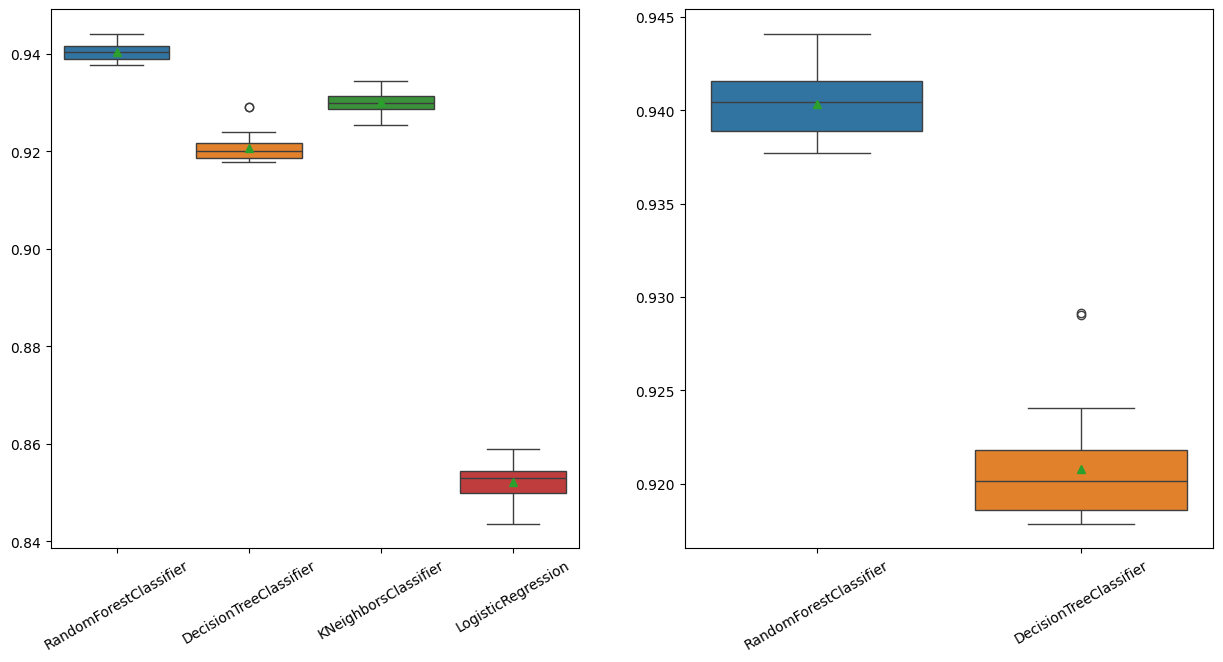

In [110]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from numpy import delete, std, mean
df = pd.read_csv('Datasets/Airplane Satisfaction/train.csv')
df_clean = df.dropna(axis=0, how='any')
# Eliminaciones de outliers
df_clean = df_clean[(df_clean['Arrival Delay in Minutes'] < 1000) & (df_clean['Departure Delay in Minutes'] < 1000)]

label_encoder = LabelEncoder()  # OJO! LabelEncoder para la target
df_clean["satisfaction"] = label_encoder.fit_transform(df_clean["satisfaction"])
df_final, y = df_clean.drop(columns=["satisfaction"]), df_clean["satisfaction"]

categorical_ix = df_final.select_dtypes(include='object').columns 
numerical_ix = df_final.select_dtypes(include=['float64','int']).columns

cat_without_class = delete(categorical_ix,-1) # Eliminamos la caracteristica Class de la lista de categoricas, esto para poder realizar un procesamiento especial con ella
numerical_without_ids = numerical_ix[3:] # Quitamos Age, Arrival Delay in Minutes y Departure Delay in Minutes

preprocessor = ColumnTransformer(
    transformers=[
        ('ord_class', OrdinalEncoder(categories=[['Eco','Eco Plus', 'Business']]), ['Class']),
        ('ordinal', OrdinalEncoder(), cat_without_class),
        ('power', PowerTransformer(method='box-cox', standardize=True), ['Age']),
        ('numerical', MinMaxScaler(), numerical_without_ids), #Aplicamos un escalado a las variables numericas
    ],
    remainder='drop'
)

columns_num = list(range(4, len(numerical_without_ids) + 1)) #+1 por la variable Age

selector = ColumnTransformer(
    transformers=[
        ('categorical', SelectKBest(score_func=chi2, k=2), [0,1,2,3]),
        ('numerical', SelectKBest(score_func=mutual_info_classif, k=6), columns_num),
    ],
    remainder='passthrough'
)

# define the data preparation and modeling pipeline
pipelines = [Pipeline(steps=[('prep', preprocessor), ('sel', selector), ('mod', m)]) for m in models]

resultados = list()
for n, p in zip(nombres, pipelines):
    #Evaluamos el modelo
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(p, df_final, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    #Calculamos el accuracy de los resultados
    resultados.append(scores)
    print('>%s %.3f (%.3f)' % (n, mean(scores), std(scores)))# plot model performance for comparison
fig, axs = plt.subplots(1,2,figsize=(15,7))
a = sns.boxplot(data=resultados,showmeans=True, ax=axs[0])
a.set_xticklabels(nombres, rotation=30)
b = sns.boxplot(data=resultados[:2], showmeans=True, ax=axs[1])
b.set_xticklabels(nombres[:2], rotation=30)
plt.show()

## Conclusiones
Finalmente observamos una mejora en los comportamientos de los diferentes modelos jugando con las diferentes tecnicas, llegando a alcanzar un 0.959 de accuracy con el RandomForest y 0.938 con el DecisionTree(manteniendo todas las columnas numericas y eliminando las categoricas). 

Asi mismo, podemos notar una notable mejora del algoritmo de KNN, pasando de una base de 0.599 hasta un 9.30, igual para el de regresion logistica donde pasamos de 0.664, hasta un accuracy de 8.60, 

En los siguientes pasos seria bueno mejorar la seleccion de la cantidad de carateristicas e indagar la correlacion existente entre las variables de identificadores y la satisfaccion de los usuarios.